In [122]:
#standard imports
import pandas as pd
import numpy as np
from scipy import stats
import env

import matplotlib.pyplot as plt

In [ ]:
# The average battery life for a fully charges iphone-12 is 14 hours with standard deviation of 1.5 hour

# What kind of probability distribution represents the random variable "battery life in hours"? continous normal distribution
# What are the appropriate defining parameters for this distribution? 14 and 1.5 
# Create a Scipy object/instance for this distribution
# Use the object create above and choose appropriate method (e.g. pmf, cdf, ppf etc.) to calculate the following:
#  a. What is the probability the cell phone battery more than 16 hours.  
#  b. What is probability that cell phone battery lasts for exactly 12 hours.  
#  c. What is the probability that cell phone battery lasts for 12 hours or less.  
#  d. How many hours do the battery lasts for top 25% longest lasting phones.   

In [10]:

mean = 14
sd = 1.5

In [11]:
cell_dist = stats.norm(mean, sd)

In [12]:
cell_dist.sf(16)

0.09121121972586788

In [13]:
cell_dist.pdf(12)

0.10934004978399577

In [14]:
cell_dist.cdf(12)

0.09121121972586788

In [18]:
cell_dist.isf(1/4)

15.011734625294123

In [ ]:
# # A bank found that the average number of cars waiting during the noon hour at a drive-up window 
# follows a Poisson distribution with a mean of 2 cars. Make a chart of this distribution and answer 
# these questions concerning the probability of cars waiting at the drive-up window.


In [30]:
car_avg = 2 


In [31]:
# # What is the probability that no cars drive up in the noon hour? 14% 

In [220]:
round(stats.poisson(car_avg).pmf(0), 2)

0.14

In [33]:
 # # What is the probability that 3 or more cars come through the drive through? 0.32 

In [221]:
round(stats.poisson(car_avg).sf(2),2)

0.32

In [35]:
# # How likely is it that the drive through gets at least 1 car? 0.86

In [223]:
stats.poisson(car_avg).sf(0)

0.8646647167633873

In [39]:
# Grades of State University graduates are normally distributed with a mean of 3.0 
# and a standard deviation of .3. Calculate the following:
u_mean = 3.0
sd = .3 

gpa = stats.norm(u_mean, sd)

In [226]:
# What grade point average is required to be in the top 5% of the graduating class?
gpa.isf(.05)

3.4934560880854417

In [48]:
# What GPA constitutes the bottom 15% of the class?
gpa.ppf(.15)

2.689069983151863

In [70]:
################ An eccentric alumnus left scholarship money for students in the third decile from 
# the bottom of their class. Determine the range of the third decile. Would a student with a 2.8 grade point average 
# qualify for this scholarship? 
bot_of_30 = gpa.ppf(.30)
top_of_30 = gpa.isf(.20)

In [228]:
print(f"{round(top_of_30, 1)} - {round(bot_of_30, 2)}")

2.8 - 3.25


In [72]:
bot_of_30

3.2524863700718742

In [233]:
# If I have a GPA of 3.5, what percentile am I in? 95th
gpa.cdf(3.5)

0.9522096477271853

In [231]:
# ########## 3. A marketing website has an average click-through rate of 2%. 
# One day they observe 4326 visitors and 97 click-throughs. How likely is it that this many people 
# or more click through? 0 

In [77]:
clicks = stats.poisson(2)

In [80]:
clicks.sf(4326)

0.0

In [82]:
##############4. You are working on some statistics homework consisting of 100 questions where all of the answers are a probability
# rounded to the hundreths place. Looking to save time, you put down random probabilities as the answer to each question.
# What is the probability that at least one of your first 60 answers is correct? 45 

In [88]:
n_trials = 100
correct = .25

In [90]:
quest_dist = stats.binom(n_trials, correct)

In [91]:
quest_dist.cdf(60)

0.9999999999999714

In [ ]:
############## 5. The codeup staff tends to get upset when the student break area is not cleaned up. 
# Suppose that there's a 3% chance that any one student cleans the break area when they visit it, and, 
# on any given day, about 90% of the 3 active cohorts of 22 students visit the break area. 
# How likely is it that the break area gets cleaned up each day? 
# How likely is it that it goes two days without getting cleaned up? All week?

In [101]:
lamb = 3

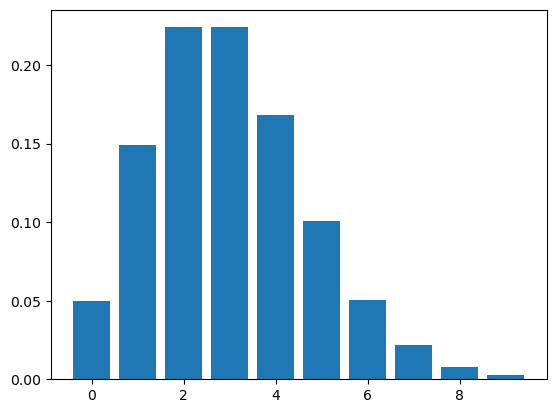

In [235]:
clean = stats.poisson(lamb)
x = np.arange(0,10)
y = [clean.pmf(i) for i in x]
plt.bar(x,y)
plt.show()

In [106]:
# 6. You want to get lunch at La Panaderia, but notice that the line is usually very long at lunchtime. 
# After several weeks of careful observation, you notice that the average number of people in line when your 
# lunch break starts is normally distributed with a mean of 15 and standard deviation of 3. 
# If it takes 2 minutes for each person to order, and 10 minutes from ordering to getting your food, 
# what is the likelihood that you have at least 15 minutes left to eat your food before you have to go back to class? 
# Assume you have one hour for lunch, and ignore travel time to and from La Panaderia. 70%

In [107]:
avg_cust = 15 
sd_cust = 3 

In [108]:
pan = stats.norm(avg_cust, sd_cust)

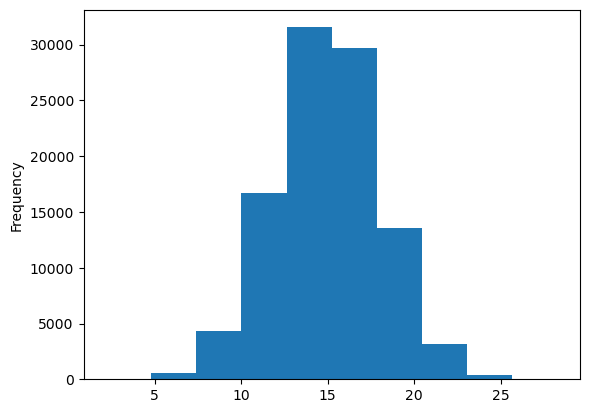

In [112]:
pd.Series(pan.rvs(100_000)).plot.hist()
plt.show()

In [239]:
(16.5 * 2) + 12

45.0

In [242]:
pan.cdf(16.5)

0.6914624612740131

In [ ]:
# 7. Connect to the employees database and find the average salary of current employees, 
# along with the standard deviation. For the following questions, calculate the answer based on 
# modeling the employees salaries with a normal distribution defined by the calculated mean and standard deviation 
# then compare this answer to the actual values present in the salaries dataset.

# What percent of employees earn less than 60,000? 0.24
# What percent of employees earn more than 95,000? 0.09
# What percent of employees earn between 65,000 and 80,000? 0.02
# What do the top 5% of employees make? 100484.64

In [164]:
employee_sal = pd.read_sql("select e.emp_no, s.salary from employees as e join salaries as s on s.emp_no = e.emp_no where s.to_date > curdate()",env.get_db_url("employees"))

In [200]:
sd_sal = employee_sal.std()
sd_sal = sd_sal[1]
avg_sal = employee_sal.mean()
avg_sal = avg_sal[1]

In [243]:
avg_sal

72012.23585730705

In [201]:
emp_sal = stats.norm(avg_sal,sd_sal)

In [203]:
emp_sal.cdf(60_000)

0.24385742480214434

In [204]:
emp_sal.sf(95_000)

0.09208819199804058

In [244]:
emp_sal.cdf(80_000) - emp_sal.cdf(65_000)

0.33506056854466654

In [215]:
round(emp_sal.isf(.05), 2)

100484.64